In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Carga de dados

In [4]:
# Carregar o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [5]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [7]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [9]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


## EDA

In [10]:
# Medidas estatisticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

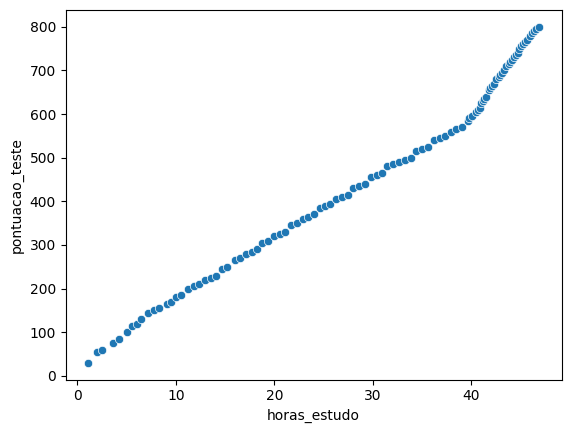

In [11]:
# plot de dispersão
# X = horas de estudo
# Y = pontuacao
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

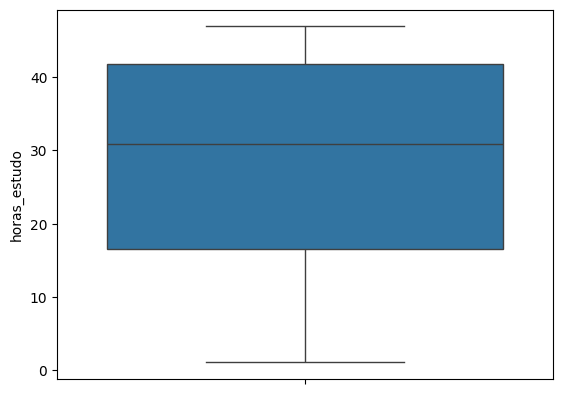

In [12]:
# Verificar outliers
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

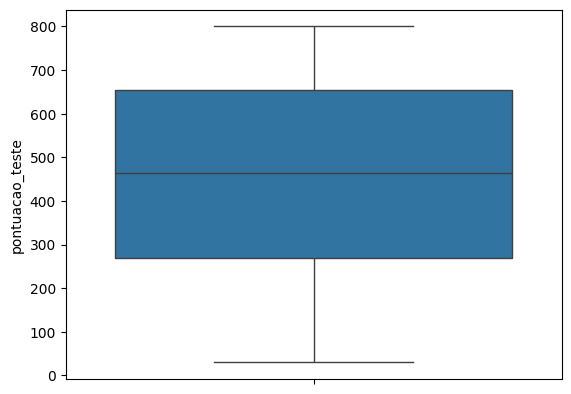

In [13]:
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<Axes: >

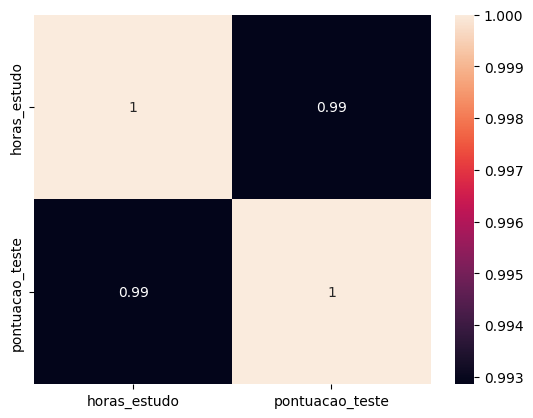

In [14]:
# Verificar correlação das variaveis - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

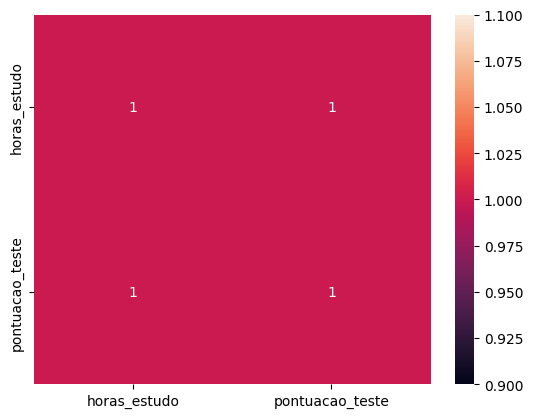

In [15]:
# Verificar correlação das variaveis - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

<Axes: xlabel='horas_estudo', ylabel='Count'>

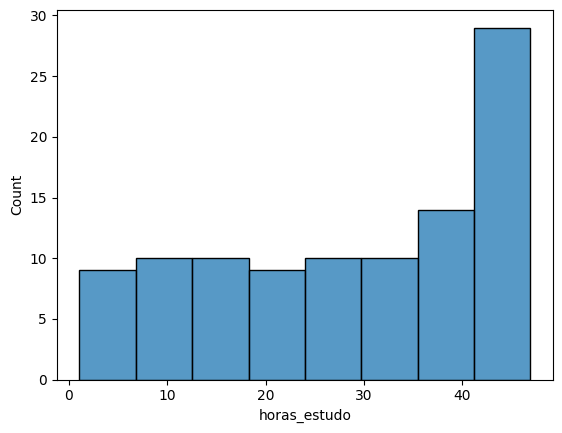

In [17]:
# Histograma
sns.histplot(df_pontuacao, x='horas_estudo')

<Axes: xlabel='pontuacao_teste', ylabel='Count'>

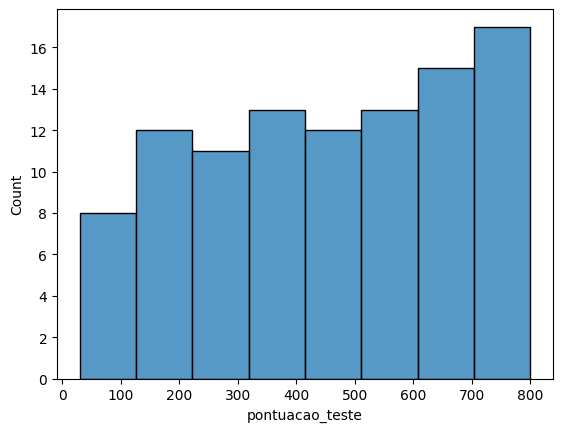

In [18]:
sns.histplot(df_pontuacao, x='pontuacao_teste')

## Treinar Modelo

In [21]:
# Dividir dataset entre treino e test
# QUando temos apenas uma feature independente, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [22]:
# Instanciar modelo a ser treinado
reg_model = LinearRegression()

In [23]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
reg_model.intercept_[0]

np.float64(8.476600783894582)

In [30]:
# Imprimir a relação da reta
# y = aX + b
print("A equacao da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equacao da reta é y = 15.642619x + 8.476601


## Validar Modelo - métricas
Aqui a ideia é validar se o modelo está condizente com o que treinamos e vamos testar, por meio de métricas que nos respondem o quão próximo estamos do real x previsto
É necessário estudar mais de como esses testes funcionam por trás para entender e interpretá-los melhor

In [31]:
# Predição dos valores com base no conjunto de teste
y_pred = reg_model.predict(X_test)

In [41]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# O objetivo é ficar mais próximo de 1
# Representa a proporção na variação da feature dependente que é explicada pela feature independente
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

r2_score(y_test, y_pred)

# variação bem próxima de 1, isso indica que a variável independente explica bem a variável dependente

0.9828400452912442

In [42]:
# Calcular métriica MAE (Mean Absolute Error)
# Diferença entre o valor predito e o valor de teste, em média
# MAE = Media(y_test - y_pred)
# É uma métrica fácil de interpretar, está na mesma escala do numero que queremos prever
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

np.float64(22.957470277134615)

In [39]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Média(y_test - y_pred)^2
# Não é uma métrica fácil de interpretar, escala está diferente do número que queremos prever
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

np.float64(766.9972992416427)

In [43]:
# Calcular métrica RMSE (Root Mean Squared Error)
# RMSE = sqrt(Média(y_test - y_pred)^2)
# É uma métrica fácil de interpretar, escala está diferente do número que queremos prever
# RMSE é mais sensível a outliers e penaliza grandes erros
root_mean_squared_error(y_test, y_pred)

np.float64(27.69471608884342)

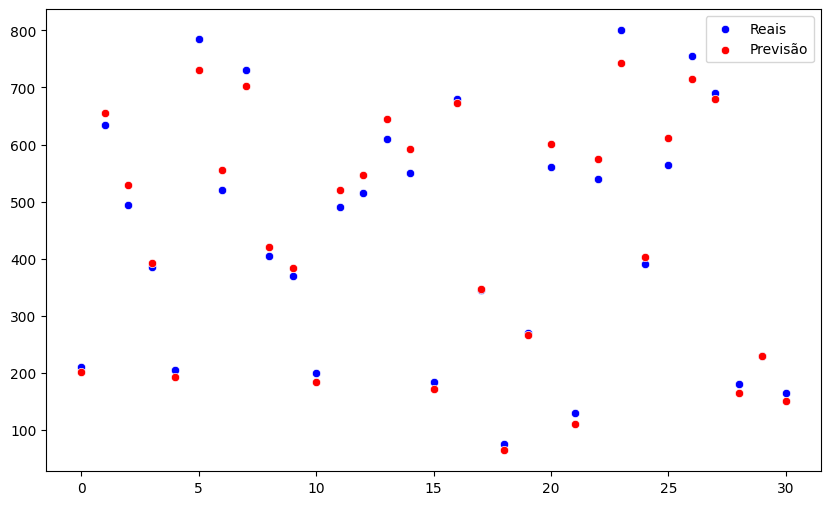

In [62]:
# Analise Gráfica - Preditos x Reais
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Previsão')
plt.legend()
plt.show()


## Análise de Resíduos

In [63]:
# Calcular resíduos
residuos = y_test - y_pred

In [65]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrao
from scipy.stats import zscore

residuos_std = zscore(residuos)

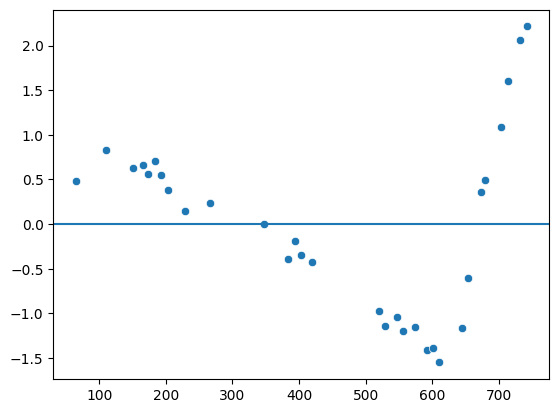

In [67]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e 2 (na escala padrão), isso indica linearidade dos resíduos

# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade
# caso contrário, se tivermos alguma tendência ou padrão (cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Não é tão linear, alguns valores fogem para acima de 2.
<br>
Além disso, não estão em volta da reta, formam um padrão indicando heterocedasticidade

Text(0, 0.5, 'Resíduos padronizados')

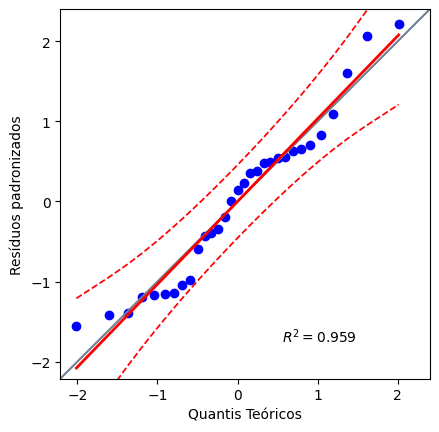

In [68]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, avalia se uma amostra segue uma distribuição normal
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos padronizados')